*Creado por:*
    
*Isabel Maniega*

Se pide crear un Clasificador para el MNIST dataset 

que incluya imágenes:
    
* en blanco y negro 
* de 10 dígitos (0-9)
* 28x28 pixels

(28,28,1)

****

**en este caso:**

* (1) LO hacemos celda a celda
* (2) Añadimos EarlyStopping, lo que hará parar el entrenamiento
* (3) Visualizamos la información, algo también interesante
* (4) model.evaluate(x_valid, y_valid)

# IMPORTAMOS NUESTRAS DEPENDENCIAS

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.saving import load_model

from matplotlib import pyplot as plt

2025-07-06 14:59:28.512893: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-06 14:59:28.540487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751806768.571952    7823 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751806768.579381    7823 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751806768.599151    7823 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# LEEMOS LOS DATOS

In [2]:
# from keras.datasets import mnist

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [3]:
# print(x_train)
# print(y_train)
# print(x_valid)
# print(y_valid)

In [4]:
x_train.max(), x_valid.max(), x_train.min(), x_valid.min()

(np.uint8(255), np.uint8(255), np.uint8(0), np.uint8(0))

# NORMALIZAMOS LOS DATOS 

**/255**

In [5]:
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0

In [6]:
x_train.max(), x_valid.max(), x_train.min(), x_valid.min()

# se ve que está escalado entre 0 y 1

(np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.0))

# reshape para x_train, x_valid

In [7]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_valid = x_valid.reshape((-1, 28, 28, 1))

In [8]:
# print(x_train)
# print(x_valid)

# VISUALIZACIÓN DE LA INFORMACIÓN

y_train es el valor de:  0


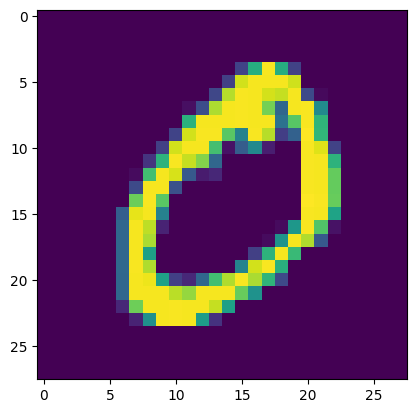

In [9]:
plt.imshow(x_train[1][:,:,0])
print('y_train es el valor de: ', y_train[1])

y_train es el valor de:  2


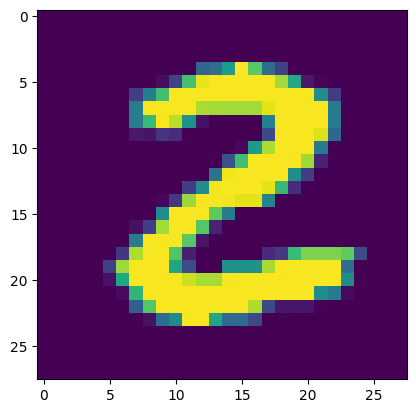

In [10]:
plt.imshow(x_train[25][:,:,0])
print('y_train es el valor de: ', y_train[25])

y_train es el valor de:  5


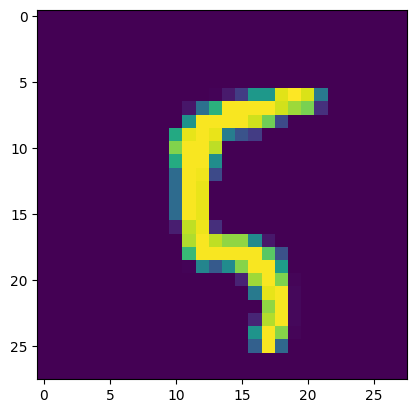

In [11]:
plt.imshow(x_train[100][:,:,0])
print('y_train es el valor de: ', y_train[100])

y_train es el valor de:  3


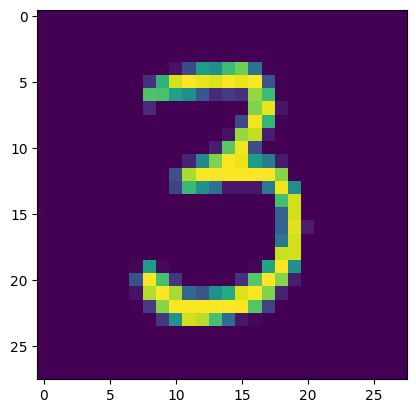

In [12]:
plt.imshow(x_train[50][:,:,0])
print('y_train es el valor de: ', y_train[50])

# MODELO

In [13]:
model = Sequential([
        Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=64, activation='relu'),
        Dense(units=10, activation='softmax')  
])

/home/isabelmaniega/Documentos/IA_Python/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751806771.166917    7823 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1180 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5,
                           min_delta=0.01,
                           verbose=1)

In [16]:
history = model.fit(x=x_train, y=y_train, 
                    epochs=10, 
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop])

Epoch 1/10


I0000 00:00:1751806772.820189    7926 service.cc:152] XLA service 0x7b3c7000b6a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751806772.820209    7926 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-07-06 14:59:32.843589: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751806772.977115    7926 cuda_dnn.cc:529] Loaded cuDNN version 90300


  21/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2942 - loss: 2.2105

I0000 00:00:1751806775.474208    7926 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9018 - loss: 0.3382 - val_accuracy: 0.9831 - val_loss: 0.0550
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9836 - loss: 0.0520 - val_accuracy: 0.9850 - val_loss: 0.0461
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9910 - val_loss: 0.0291
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9922 - loss: 0.0235 - val_accuracy: 0.9906 - val_loss: 0.0292
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.9904 - val_loss: 0.0304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9902 - val_loss: 0.0321
Epoch 6: early stopping


# GRÁFICAS DE ENTRENAMIENTO

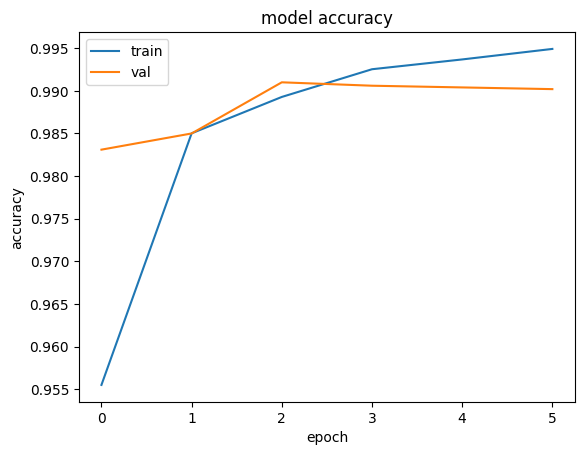

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

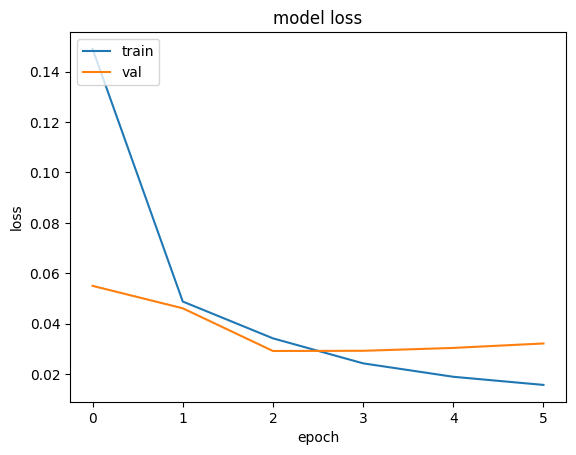

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
# model.evaluate(x_valid, y_valid)

# GUARDAMOS EL MODELO

In [20]:
model.save("model_2.h5")

# CARGAMOS EL MODELO

In [21]:
model = load_model("model_2.h5")

# RESUMEN

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,932 (476.30 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Evaluate

In [23]:
model.evaluate(x_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9865 - loss: 0.0424


[0.03213496133685112, 0.9901999831199646]

In [24]:
loss, accuracy = model.evaluate(x_valid, y_valid)
print('\n')
print('loss:', loss)
print('accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9865 - loss: 0.0424


loss: 0.03213496133685112
accuracy: 0.9901999831199646


*Creado por:*
    
*Isabel Maniega*